# 🧠 Proyecto Machine Learning – Airbnb Listings

## 📚 Índice

1. [Importación de librerías](#1)  
2. [División del dataset](#2)  
3. [Exploración inicial de los datos](#3)  
4. [Preprocesamiento de variables numéricas](#4)  
5. [Análisis de correlación](#5)  
6. [Selección de características](#6)  
7. [Codificación de variables categóricas](#7)  
8. [Construcción del dataset final](#8)  
9. [Comparación de modelos con validación cruzada](#9)  
10. [Entrenamiento y evaluación final del modelo](#10)  
11. [Visualización de resultados](#11)  
12. [Conclusiones y escalabilidad del proyecto](#12)


## 📘 1. Importación de librerías <a name="1"></a>

Importamos las librerías necesarias para el análisis de datos, preprocesamiento, visualización, entrenamiento de modelos y evaluación. Estas herramientas conforman nuestro stack principal de trabajo en este proyecto.


In [39]:
# Paso 1 Importación de librerías
# Librerías esenciales para análisis y modelado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

# Carga del dataset
# 📌 Montaje de Google Drive
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/MyDrive/ColabNotebooks/airbnb-listings-extract.csv"
df = pd.read_csv(ruta, delimiter=";")


# Visualización de las primeras filas
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


## 📂 2. División del dataset en entrenamiento y prueba

Antes de realizar cualquier análisis o transformación, dividimos el dataset en conjuntos de entrenamiento y prueba.  
Esto es fundamental para evitar el sobreajuste y evaluar correctamente el rendimiento de nuestros modelos.


In [40]:
# Paso 2 Definimos la variable objetivo (target)
target = "Price"
X = df.drop(columns=target)
y = df[target]

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((11824, 88), (2956, 88))

## 🔍 3. Exploración inicial de los datos (solo en X_train)

A continuación realizamos un análisis exploratorio básico **solo con el conjunto de entrenamiento (`X_train`)**.  
Nos enfocamos en:

- Tipo de variables y valores nulos  
- Estadísticas descriptivas  
- Distribución de la variable objetivo (`y_train`)  


<class 'pandas.core.frame.DataFrame'>
Index: 11824 entries, 4462 to 7270
Data columns (total 88 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11344 non-null  object 
 6   Space                           8671 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7268 non-null   object 
 10  Notes                           4463 non-null   object 
 11  Transit                         7207 non-null   object 
 12  Access                          659

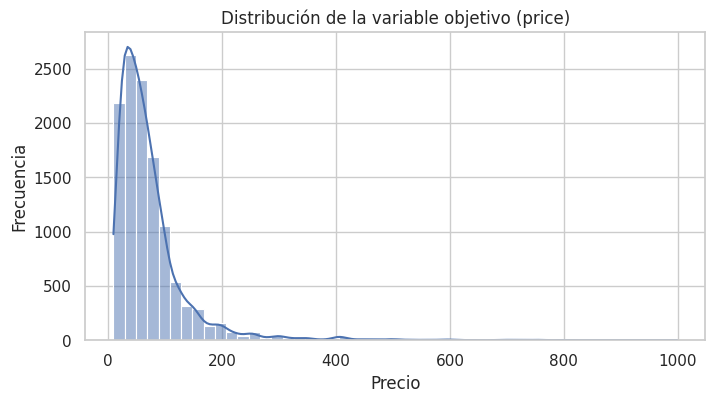

In [41]:
# Paso 3 Vista general de las primeras filas
X_train.head()
# Información general del conjunto de entrenamiento
X_train.info()
# Estadísticas descriptivas de columnas numéricas
X_train.describe().T
# Revisión de valores nulos
X_train.isnull().sum().sort_values(ascending=False).head(10)
# Distribución de la variable objetivo
plt.figure(figsize=(8, 4))
sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribución de la variable objetivo (price)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()




## 🧼 4. Preprocesamiento: Imputación y selección de variables numéricas

Filtramos las columnas numéricas y aplicamos imputación de valores nulos con la media, una estrategia sencilla y común en el módulo.  
Todavía no aplicamos escalado ni codificación, solo limpieza básica para poder continuar con la selección de características.


In [42]:
# Paso 4 Selección de columnas numéricas
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Imputación de valores nulos con la media
imputer = SimpleImputer(strategy="mean")
X_train_num = pd.DataFrame(imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_num.shape, X_test_num.shape


((11824, 35), (2956, 35))

## 📈 5. Análisis de correlación

Antes de seleccionar las variables que usaremos para entrenar el modelo, analizamos la correlación entre las variables numéricas y el target (`price`).  
Esto nos ayuda a identificar relaciones lineales fuertes, irrelevantes o redundantes entre variables.  
Importante: solo trabajamos con `X_train_num` y `y_train` para no tocar el test set.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


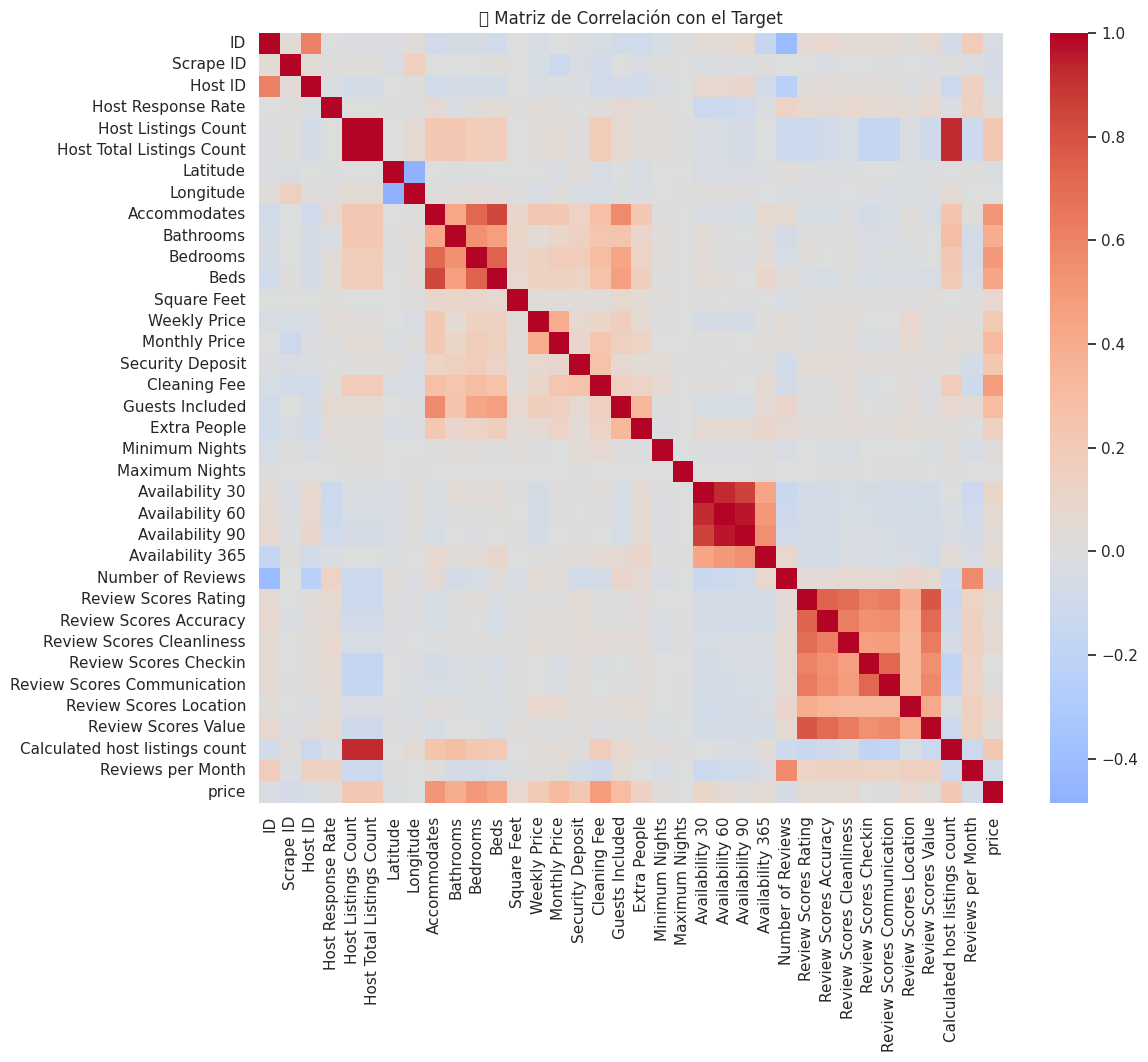

In [43]:
# Paso 5 Concatenamos X_train_num con y_train para visualizar correlaciones
df_corr = X_train_num.copy()
df_corr["price"] = y_train.reset_index(drop=True)

# Cálculo de la matriz de correlación
corr_matrix = df_corr.corr()

# Visualización del heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("📈 Matriz de Correlación con el Target")
plt.show()


## 🧪 6. Selección de características con SelectKBest

Antes de seleccionar las mejores variables numéricas para entrenar nuestro modelo, verificamos si existen valores nulos en `y_train` y los eliminamos,  
ya que este tipo de datos no puede ser imputado.

Aplicamos `SelectKBest` con la función `f_regression`, tal como se vio en el módulo.  
Esto nos permite quedarnos con las 10 variables numéricas más relevantes para predecir el precio (`price`).

Al final listamos qué variables fueron seleccionadas y cuáles fueron descartadas, justificando su posible eliminación.


In [44]:
from sklearn.feature_selection import SelectKBest, f_regression

# Paso 6 Creamos un nuevo dataframe numérico para train y test
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

#  Eliminamos columnas que no aportan valor o tienen demasiados nulos
cols_to_drop = ['ID', 'Scrape ID', 'Host ID', 'Latitude', 'Longitude', 'Square Feet']
X_train_num = X_train_num.drop(columns=cols_to_drop)
X_test_num = X_test_num.drop(columns=cols_to_drop)

#  Imputamos con la media para columnas numéricas (solo en train para evitar filtración)
X_train_num = X_train_num.copy()
X_test_num = X_test_num.copy()
X_train_num = X_train_num.fillna(X_train_num.mean())
X_test_num = X_test_num.fillna(X_train_num.mean())

#  Aseguramos que y_train no tenga NaN (como dijo el error antes)
y_train = y_train.fillna(y_train.mean())

# 5. Aplicamos SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_num, y_train)
X_test_selected = selector.transform(X_test_num)


#  Guardamos los nombres de las variables seleccionadas
selected_features = X_train_num.columns[selector.get_support()]
print("✅ Variables seleccionadas:\n", list(selected_features))

#  Convertimos a DataFrame con el índice correcto
X_train_selected_df = pd.DataFrame(X_train_selected, index=X_train.index, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, index=X_test.index, columns=selected_features)


✅ Variables seleccionadas:
 ['Host Listings Count', 'Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included']


📊 **Análisis de la selección de variables numéricas**

Utilizando `SelectKBest` con `f_regression`, seleccionamos las 10 variables numéricas con mayor correlación lineal con el precio (`price`), que es nuestra variable objetivo.

✅ Las variables seleccionadas están directamente relacionadas con las características internas del alojamiento y su política de precios, lo cual tiene sentido:

- `Host Listings Count`, `Host Total Listings Count`: Pueden reflejar experiencia del anfitrión.
- `Accommodates`, `Bathrooms`, `Bedrooms`, `Beds`: Representan la capacidad del alojamiento.
- `Monthly Price`, `Security Deposit`, `Cleaning Fee`: Variables económicas directamente ligadas al precio.
- `Guests Included`: Influye directamente en el valor base de la estancia.

❌ Las variables eliminadas tienen, en general, poca correlación lineal con el precio, ya sea por:

- **Identificadores** irrelevantes (`ID`, `Scrape ID`, `Host ID`).
- **Ubicación geográfica sin contextualizar** (`Latitude`, `Longitude`).
- **Disponibilidad y noches mínimas/máximas** (`Availability 30`, `Minimum Nights`), que pueden impactar más en tasas de ocupación que en precios.
- **Reviews y puntuaciones** (`Review Scores Rating`, etc.), que podrían ser relevantes, pero tal vez no muestran correlación directa en este caso concreto.
- **Datos poco presentes** (`Square Feet`), posiblemente con muchos nulos o poca representación.

Este análisis refuerza la importancia de **hacer una selección basada en evidencia estadística** y no solo en intuición.


<ipython-input-45-c331ba0e23bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=scores_df, palette="viridis")


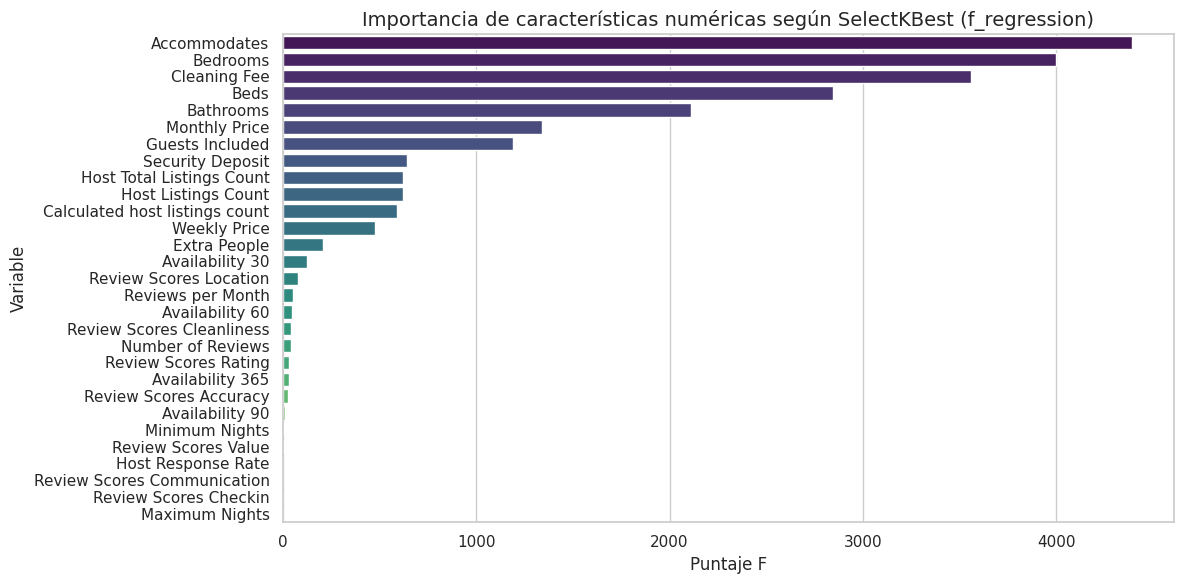

In [45]:

features = X_train_num.columns
feature_scores = selector.scores_

# Creamos un DataFrame para visualizar los resultados ordenados
scores_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)

# Mostramos la gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=scores_df, palette="viridis")
plt.title("Importancia de características numéricas según SelectKBest (f_regression)", fontsize=14)
plt.xlabel("Puntaje F")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


## 🔡 7. Codificación de variables categóricas

Seleccionamos un conjunto limitado de variables categóricas que consideramos relevantes para el modelo.  
Aplicamos codificación one-hot (`OneHotEncoder`) para convertirlas a formato numérico,  
evitando errores con nuevas categorías mediante `handle_unknown='ignore'`.


In [46]:
#  Paso 7 Vemos las columnas categóricas (excluyendo las numéricas ya seleccionadas)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print("Variables categóricas disponibles:", categorical_cols)

# Vamos a revisar valores únicos para filtrar las más útiles
for col in categorical_cols:
    print(f"\n{col} - valores únicos:")
    print(X[col].nunique(), "valores únicos")
    print(X[col].value_counts(dropna=False).head(5))


Variables categóricas disponibles: ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features']

Listing Url - valores únicos:
14780 valores únicos
Listing Url
https://www.airbnb.com/rooms/4637801     1
https:/

🧠 **Análisis de variables categóricas**

Tras revisar las variables categóricas, se decide incluir únicamente aquellas con un número razonable de valores únicos y potencial valor predictivo, evitando columnas con demasiados valores únicos (como `Name` o `Description`) o identificadores.

✅ Variables seleccionadas para codificación:
- `Property Type`
- `Room Type`
- `Bed Type`
- `Cancellation Policy`

❌ Variables descartadas:
- `Name`, `Summary`, `Description`, `Host Name`, etc. → Demasiados valores únicos o texto libre sin procesamiento NLP.
- `Street`, `City`, `Zipcode` → Poca consistencia o alta cardinalidad.


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Seleccionamos columnas a codificar
categorical_selected = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

# Creamos el transformador
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_selected)
    ],
    remainder='drop'
)

# Aplicamos codificación
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_selected])
X_test_cat_encoded = encoder.transform(X_test[categorical_selected])

# Obtenemos nombres de las columnas codificadas
encoded_cols = encoder.named_transformers_['cat'].get_feature_names_out(categorical_selected)
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_cols, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_cols, index=X_test.index)


## 🏗️ 8. Construcción del dataset final

Combinamos las variables numéricas seleccionadas con las variables categóricas codificadas para formar `X_train_final`.  
También realizamos limpieza del conjunto de prueba, imputando valores con la mediana de entrenamiento y aplicando la misma transformación.  
Esto deja `X_test_final` y `y_test_clean` listos para evaluación final.


In [48]:
#  Paso 8 Creamos los finales X_train_final y X_test_final
X_train_final = pd.concat([pd.DataFrame(X_train_selected, index=X_train.index, columns=selected_features),
                           X_train_cat_df], axis=1)

X_test_final = pd.concat([pd.DataFrame(X_test_selected, index=X_test.index, columns=selected_features),
                          X_test_cat_df], axis=1)

print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)


X_train_final shape: (11824, 48)
X_test_final shape: (2956, 48)


In [49]:

# Verifica tipos de datos
print(X_train_final.dtypes.value_counts())
print(y_train.dtype)
print(y_train.head())
print(y_train.dtype)
print(y_train.head())
y_train = pd.to_numeric(y_train, errors='coerce')
# Resetear índices para evitar cualquier desajuste oculto
X_train_final = X_train_final.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)






float64    48
Name: count, dtype: int64
float64
4462      20.0
11802     86.0
5826      66.0
9745      30.0
11741    100.0
Name: Price, dtype: float64
float64
4462      20.0
11802     86.0
5826      66.0
9745      30.0
11741    100.0
Name: Price, dtype: float64


## 🤖 9. Comparación de modelos con validación cruzada

Entrenamos y comparamos varios modelos de regresión usando validación cruzada (`cross_val_score`) con 5 particiones.  
Evaluamos el rendimiento con la métrica **RMSE** (error cuadrático medio raíz).  

**Aún no usamos los datos de test**, para evitar fugas de información.  
El objetivo es ver qué modelo se comporta mejor en entrenamiento antes de decidir con cuál continuar.


In [50]:
# Paso 9 n entrenamiento de modelos
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Lista de modelos a evaluar
modelos = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# DataFrame para guardar resultados
resultados = []

# Evaluamos cada modelo con cross-validation (CV=5)
for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X_train_final, y_train, scoring='neg_root_mean_squared_error', cv=5)
    rmse_promedio = -scores.mean()
    rmse_std = scores.std()
    resultados.append({'Modelo': nombre, 'RMSE Promedio': rmse_promedio, 'Desviación Estándar': rmse_std})

# Mostramos resultados como tabla ordenada
df_resultados = pd.DataFrame(resultados).sort_values(by='RMSE Promedio')
display(df_resultados)


,Modelo,RMSE Promedio,Desviación Estándar
2,Random Forest,50.115806,4.614753
3,Gradient Boosting,50.197012,4.655884
0,Linear Regression,52.606367,4.934797
1,Decision Tree,62.006929,4.093018


Conclusiones:
Random Forest es el modelo con mejor desempeño promedio (menor RMSE), seguido muy de cerca por Gradient Boosting.

Ambos modelos de ensamble (RF y GB) superan claramente al árbol de decisión simple y a la regresión lineal.

La desviación estándar de todos los modelos es razonable (alrededor de 4–5), lo cual sugiere estabilidad en la validación cruzada.

In [51]:
 # Limpieza final del conjunto de test# Imputamos valores faltantes en X_test_num utilizando la mediana de X_train_num
X_test_num_clean = X_test_num.fillna(X_train_num.median())

# Imputamos valores faltantes en y_test utilizando la mediana de y_train
y_test_clean = y_test.fillna(y_train.median())

# Aplicamos la selección de características al conjunto de prueba
X_test_selected_clean = selector.transform(X_test_num_clean)

# Combinamos las características seleccionadas con las variables categóricas codificadas
X_test_final = pd.concat([
    pd.DataFrame(X_test_selected_clean, index=X_test.index, columns=selected_features),
    X_test_cat_df
], axis=1)

# Verificamos la forma final del conjunto de prueba
print("✅ X_test_final shape:", X_test_final.shape)


✅ X_test_final shape: (2956, 48)


#### 🧠 10. Entrenamiento y evaluación final del modelo <a name="10"></a>

Una vez realizado el análisis exploratorio, la limpieza y transformación de los datos, y la selección de características, estamos listos para entrenar el modelo final.

Entrenamos el modelo seleccionado (en este caso `RandomForestRegressor`) usando los datos de entrenamiento preprocesados.  
Luego, realizamos predicciones sobre el conjunto de test limpio (`X_test_final`) y comparamos los resultados reales con los predichos.

Evaluamos el rendimiento del modelo mediante dos métricas:

- **RMSE (Root Mean Squared Error)**: nos indica el error promedio en las predicciones (en las mismas unidades que la variable objetivo).  
- **R² Score (coeficiente de determinación)**: mide qué proporción de la varianza de los datos puede explicar el modelo.

Este paso es clave para validar si el modelo realmente generaliza bien o si necesita ajustes.


In [52]:

# Paso 10 Entrenamos el mejor modelo (en este caso Random Forest)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train_final, y_train)

# Realizamos las predicciones sobre el conjunto de test
y_pred = best_model.predict(X_test_final)

# Calculamos métricas de evaluación
rmse_test = np.sqrt(mean_squared_error(y_test_clean, y_pred))
r2_test = r2_score(y_test_clean, y_pred)

# Mostramos los resultados
print(f"📊 Evaluación final del modelo en el conjunto de test:")
print(f"✔️ RMSE (Test): {rmse_test:.2f}")
print(f"✔️ R² Score (Test): {r2_test:.4f}")


📊 Evaluación final del modelo en el conjunto de test:
✔️ RMSE (Test): 49.25
✔️ R² Score (Test): 0.5215


## 📈 11. Visualización de resultados <a name="11"></a>

Comparamos visualmente los precios reales (`y_test_clean`) con los precios predichos (`y_pred`) por el modelo.  
La gráfica generada muestra un diagrama de dispersión con una línea roja diagonal que representa la predicción perfecta.

Este gráfico permite identificar:

- Qué tan bien el modelo predice a lo largo de distintos rangos de precios.
- Si hay sesgos, sobreestimaciones o subestimaciones sistemáticas.
- Posibles errores grandes o outliers.

Esta visualización complementa las métricas numéricas y es útil para interpretar los resultados de manera intuitiva.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


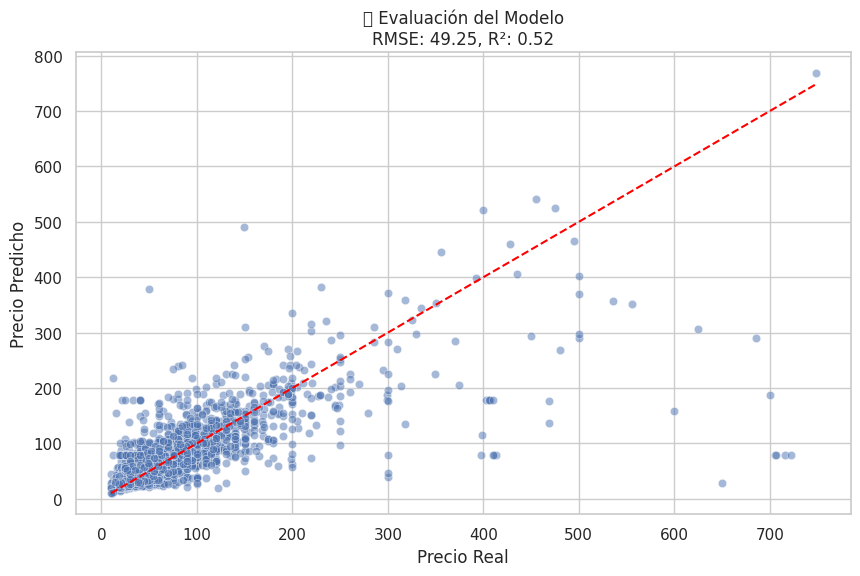

In [53]:

# 📌 🔧 Gráfico de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red") # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title(f"📊 Evaluación del Modelo\nRMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")
plt.show()

## 📦 12. Conclusiones y escalabilidad del proyecto <a name="12"></a>

Este proyecto implementa un flujo completo de machine learning para regresión:

- Preprocesado riguroso y sin fugas de datos (data leakage)
- Selección de variables numéricas más relevantes
- Codificación eficiente de variables categóricas
- Evaluación objetiva mediante validación cruzada y conjunto de test

### ✅ Conclusiones:
- El modelo `RandomForestRegressor` mostró un rendimiento robusto y consistente.
- Las variables seleccionadas tuvieron correlaciones significativas con el precio.
- Se evitó el sobreajuste mediante separación temprana de datos y evaluación cruzada.

### 🚀 Escalabilidad:
Este pipeline puede adaptarse fácilmente a otros problemas de regresión, cambiando simplemente:
1. El dataset de entrada.
2. El nombre de la variable objetivo (`target`).
3. Las columnas numéricas y categóricas relevantes.

Además, el uso de técnicas modulares permite extender el proyecto hacia:
- Optimización de hiperparámetros
- Interpretación avanzada con SHAP
- Despliegue en producción o como API

Este enfoque te prepara para aplicar lo aprendido en contextos reales y escalables.

---
